In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri

In [4]:
rpy2.robjects.numpy2ri.activate()

In [5]:
codigo_r = """
saludar <- function(cadena){
    return(paste("Hola, ", cadena))
}
"""

In [6]:
ro.r(codigo_r)

R object with classes: ('function',) mapped to:
<SignatureTranslatedFunction - Python:0x00000240ABFA8588 / R:0x00000240B69EF350>

In [7]:
saludar_py = ro.globalenv['saludar']

In [8]:
saludar_py('Antonio Banderas')

"'Hola, Antonio Banderas'"


In [9]:
res = saludar_py('Antonio Banderas')

In [10]:
res[0]

'Hola,  Antonio Banderas'

In [11]:
var_from_python = ro.FloatVector(np.arange(1,5,0.1))

In [12]:
var_from_python

1.000000,1.100000,1.200000,1.300000,...,4.600000,4.700000,4.800000,4.900000


In [13]:
print(var_from_python.r_repr())

c(1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 
2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 
3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 
4.9)


In [14]:
ro.globalenv['var_to_r'] = var_from_python

In [15]:
ro.r('var_to_r')

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

In [16]:
ro.r('sum(var_to_r)')

array([118.])

In [17]:
ro.r('sd(var_to_r)')

array([1.16904519])

In [18]:
np.sum(var_from_python)

118.00000000000007

In [19]:
np.mean(var_from_python)

2.950000000000002

In [20]:
ro.r('summary(var_to_r)')

array([1.   , 1.975, 2.95 , 2.95 , 3.925, 4.9  ])

In [22]:
ro.r('hist(var_to_r)')

R object with classes: ('histogram',) mapped to:
<ListVector - Python:0x000001F40B3931C8 / R:0x000001F41598A368>
[Float..., IntVe..., Float..., Float..., StrVe..., BoolV...]
  breaks: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000001F40AE69388 / R:0x000001F413C16818>
[1.000000, 1.500000, 2.000000, 2.500000, ..., 3.500000, 4.000000, 4.500000, 5.000000]
  counts: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x000001F414D52648 / R:0x000001F4159812D8>
[6, 5, 5, 5, 5, 5, 5, 4]
  density: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000001F414D4D188 / R:0x000001F41598A838>
[0.300000, 0.250000, 0.250000, 0.250000, 0.250000, 0.250000, 0.250000, 0.200000]
  mids: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000001F414D4DBC8 / R:0x000001F41598A598>
[1.250000, 1.750000, 2.250000, 2.750000, 3.250000, 3.750000, 4.250000, 4.750000]
  xname: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x000001F414D4D688 / R:0x000001F41597FE80>
['var_to_r']
  equidist: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x000001F414D52788 / R:0x000001F4119B3E10>
[       1]

### Trabajar de forma conjunta entre R y Python

In [21]:
from rpy2.robjects.packages import importr #Importar librerias desde R

In [24]:
ro.r("install.packages('extRemes')") #Instalar el paquete extremes de R
extremes = importr('extRemes')

In [25]:
fevd = extremes.fevd

In [28]:
print(fevd.__doc__) #Documentación

Python representation of an R function.
description
-----------


 Fit a univariate extreme value distribution functions (e.g., GEV, GP, PP, Gumbel, or Exponential) to data; possibly with covariates in the parameters.
 


fevd(
    x,
    data,
    threshold = rinterface.NULL,
    threshold_fun = ~,
    location_fun = ~,
    scale_fun = ~,
    shape_fun = ~,
    use_phi = False,
    type = c,
    method = c,
    initial = rinterface.NULL,
    span,
    units = rinterface.NULL,
    time_units = days,
    period_basis = year,
    na_action = <rpy2.rinterface.ListSexpVector - Python:0x00000240B821CCA8 / R:0x00000240BCE6D670>,
    optim_args = rinterface.NULL,
    priorFun = rinterface.NULL,
    priorParams = rinterface.NULL,
    proposalFun = rinterface.NULL,
    proposalParams = rinterface.NULL,
    iter = 9999.0,
    weights = 1.0,
    blocks = rinterface.NULL,
    verbose = False,
)

x :  `fevd`: `x` can be a numeric vector, the name of a column of `data` or a formula giving the data t

In [33]:
data = pd.read_csv("python-ml-course-master/datasets/time/time_series.txt",sep = "\s+",skiprows = 1, parse_dates = [[0,1]], names = ["date","time","wind_speed"],index_col = 0)

In [34]:
data.head(5)

,wind_speed
date_time,
1983-01-01 00:00:00,7.9
1983-01-01 01:00:00,8.2
1983-01-01 02:00:00,8.5
1983-01-01 03:00:00,9.0
1983-01-01 04:00:00,9.9


In [35]:
data.shape

(275352, 1)

In [36]:
max_ws = data.wind_speed.groupby(pd.TimeGrouper(freq='A')).max()

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


In [37]:
max_ws

date_time
1983-12-31    22.2
1984-12-31    25.5
1985-12-31    21.5
1986-12-31    22.5
1987-12-31    23.7
1988-12-31    22.5
1989-12-31    21.7
1990-12-31    29.7
1991-12-31    24.2
1992-12-31    23.8
1993-12-31    28.1
1994-12-31    23.4
1995-12-31    23.7
1996-12-31    25.6
1997-12-31    23.2
1998-12-31    24.9
1999-12-31    22.8
2000-12-31    24.6
2001-12-31    22.3
2002-12-31    25.5
2003-12-31    22.6
2004-12-31    24.0
2005-12-31    20.8
2006-12-31    23.5
2007-12-31    24.4
2008-12-31    24.1
2009-12-31    25.1
2010-12-31    19.4
2011-12-31    22.8
2012-12-31    24.2
2013-12-31    25.0
2014-12-31    25.3
Freq: A-DEC, Name: wind_speed, dtype: float64

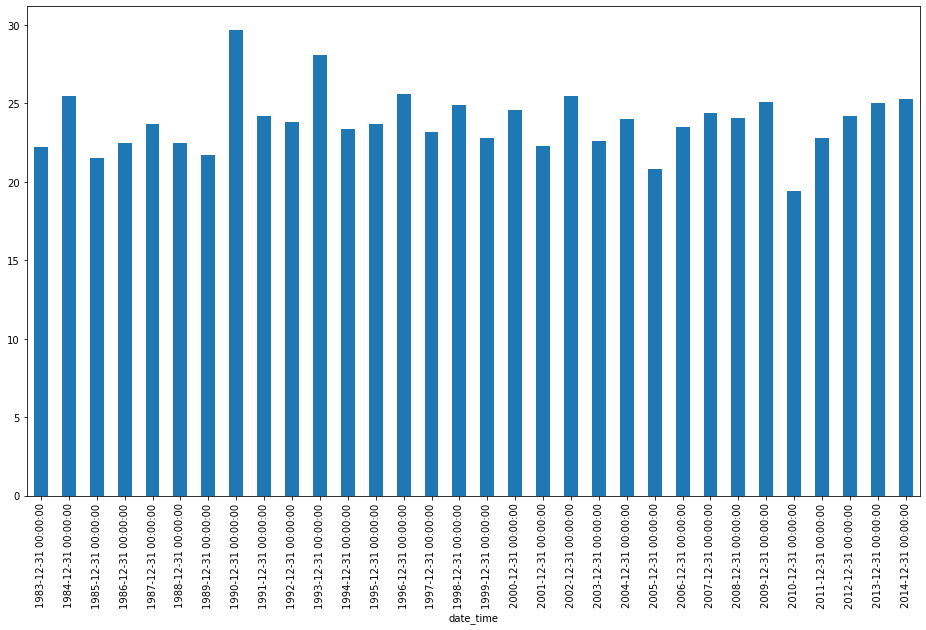

In [38]:
max_ws.plot(kind='bar',figsize=(16,9))

In [39]:
result = fevd(max_ws.values,type= 'GEV',method = 'GMLE')

In [40]:
print(type(result))

<class 'rpy2.robjects.vectors.ListVector'>


In [41]:
result.r_repr()

'structure(list(call = (function (x, data, threshold = NULL, threshold.fun = ~1, \n    location.fun = ~1, scale.fun = ~1, shape.fun = ~1, use.phi = FALSE, \n    type = c("GEV", "GP", "PP", "Gumbel", "Exponential"), method = c("MLE", \n        "GMLE", "Bayesian", "Lmoments"), initial = NULL, span, \n    units = NULL, time.units = "days", period.basis = "year", \n    na.action = na.fail, optim.args = NULL, priorFun = NULL, \n    priorParams = NULL, proposalFun = NULL, proposalParams = NULL, \n    iter = 9999, weights = 1, blocks = NULL, verbose = FALSE) \n{\n    if (verbose) \n        begin.tiid <- Sys.time()\n    out <- list()\n    inout <- list()\n    out$call <- match.call()\n    if (!missing(data)) {\n        out$data.name <- c(deparse(substitute(x)), deparse(substitute(data)))\n    }\n    else {\n        out$data.name <- c(deparse(substitute(x)), "")\n    }\n    type <- match.arg(type)\n    method <- match.arg(method)\n    out$weights <- weights\n    if (!missing(data)) {\n        i

In [43]:
print(result.names)

 [1] "call"            "data.name"       "weights"         "missing.values" 

 [5] "in.data"         "x"               "priorFun"        "priorParams"    

 [9] "method"          "type"            "period.basis"    "par.models"     

[13] "const.loc"       "const.scale"     "const.shape"     "n"              

[17] "na.action"       "parnames"        "results"         "initial.results"



In [45]:
res = result.rx("results")

In [50]:
print(res[0])

$par

  location      scale      shape 

23.0639415  1.7576913 -0.1628816 



$value

[1] 1e+16



$counts

function gradient 

       1        1 



$convergence

[1] 0



$message

NULL



$hessian

         location scale shape

location        0     0     0

scale           0     0     0

shape           0     0     0



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

[1] 1







In [54]:
loc,scale,shape = res[0].rx('par')[0]

In [55]:
loc

23.063941519915588

In [56]:
scale

1.7576912874286317

In [57]:
shape

-0.1628816367714792

### Función mágica para R

In [59]:
%load_ext rpy2.ipython

In [61]:
help(rpy2.ipython.rmagic.RMagics.R)

Help on function R in module rpy2.ipython.rmagic:

R(self, line, cell=None, local_ns=None)
    ::
    
      %R [-i INPUT] [-o OUTPUT] [-n] [-w WIDTH] [-h HEIGHT] [-p POINTSIZE]
             [-b BG] [--noisolation] [-u {px,in,cm,mm}] [-r RES] [-c CONVERTER]
             [code [code ...]]
    
    Execute code in R, optionally returning results to the Python runtime.
    
    In line mode, this will evaluate an expression and convert the returned
    value to a Python object.  The return value is determined by rpy2's
    behaviour of returning the result of evaluating the final expression.
    
    Multiple R expressions can be executed by joining them with semicolons::
    
        In [9]: %R X=c(1,4,5,7); sd(X); mean(X)
        Out[9]: array([ 4.25])
    
    In cell mode, this will run a block of R code. The resulting value
    is printed if it would be printed when evaluating the same code
    within a standard R REPL.
    
    Nothing is returned to python by default in cell mode::

In [78]:
%R X=c(1,4,5,7); sd(X); mean(X)

array([4.25])

In [79]:
%%R
Y = c(2,4,3,9)
lm = lm(Y~X)
summary(lm)

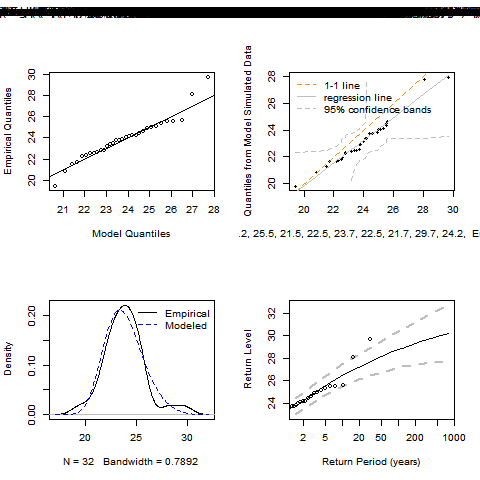

In [73]:
%R -i result plot.fevd(result)

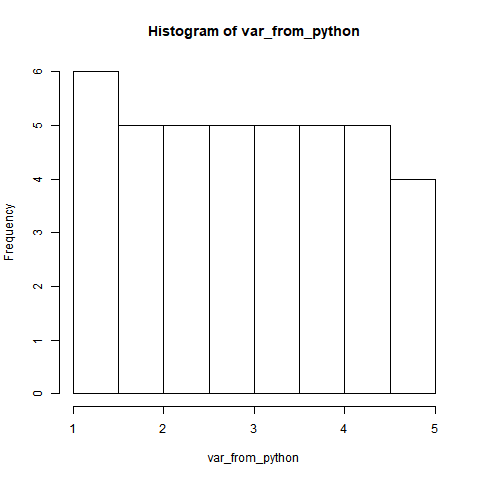

R object with classes: ('histogram',) mapped to:
<ListVector - Python:0x00000240C47D2B88 / R:0x00000240BBE7C258>
[Float..., IntVe..., Float..., Float..., StrVe..., BoolV...]
  breaks: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x00000240C4699388 / R:0x00000240BCB7A1E0>
[1.000000, 1.500000, 2.000000, 2.500000, ..., 3.500000, 4.000000, 4.500000, 5.000000]
  counts: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x00000240C46A0088 / R:0x00000240BCB57CC0>
[6, 5, 5, 5, 5, 5, 5, 4]
  density: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x00000240BE00FD48 / R:0x00000240BBE7C728>
[0.300000, 0.250000, 0.250000, 0.250000, 0.250000, 0.250000, 0.250000, 0.200000]
  mids: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x00000240C4A476C8 / R:0x00000240BBE7C488>
[1.250000, 1.750000, 2.250000, 2.750000, 3.250000, 3.750000, 4.250000, 4.750000]
  xname: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x00000240C4A4A148 / R:0x00000240BB98E1E8>
['var_from_python']
  equidist: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x00000240C4A4AF48 / R:0x00000240B2FC3E10>
[       1]

In [74]:
%R -i var_from_python hist(var_from_python)

In [ ]:
ro.globalenv['result'] = result
ro.r('plot.fevd(res)') #Puede dar error y generar un objeto NULL

# Un ejemplo complejo de R, Python y Rmagic

In [85]:
metodos = ['MLE','GMLE']
tipos = ['GEV','Gumbel']

Tipo de Ajuste:  GEV
Tipo de Método del Ajuste:  MLE
$par

  location      scale      shape 

23.0517078  1.8085853 -0.1497984 



$value

[1] 66.22729



$counts

function gradient 

      28        6 



$convergence

[1] 0



$message

NULL



$hessian

           location      scale     shape

location  9.1825628 -0.3982934  11.22038

scale    -0.3982934 21.4422632  19.81854

shape    11.2203805 19.8185358 172.17411



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

[1] 1







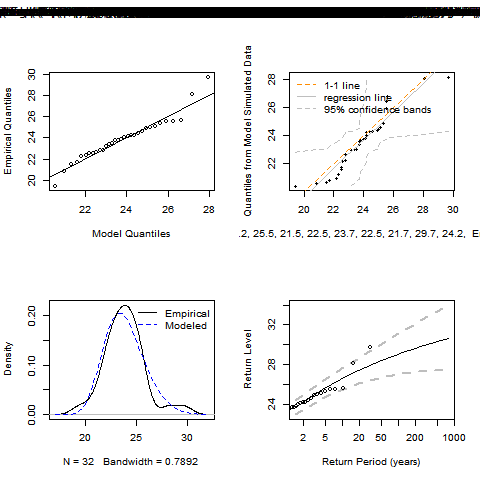

Tipo de Ajuste:  GEV
Tipo de Método del Ajuste:  GMLE
$par

  location      scale      shape 

23.0639415  1.7576913 -0.1628816 



$value

[1] 1e+16



$counts

function gradient 

       1        1 



$convergence

[1] 0



$message

NULL



$hessian

         location scale shape

location        0     0     0

scale           0     0     0

shape           0     0     0



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

[1] 1







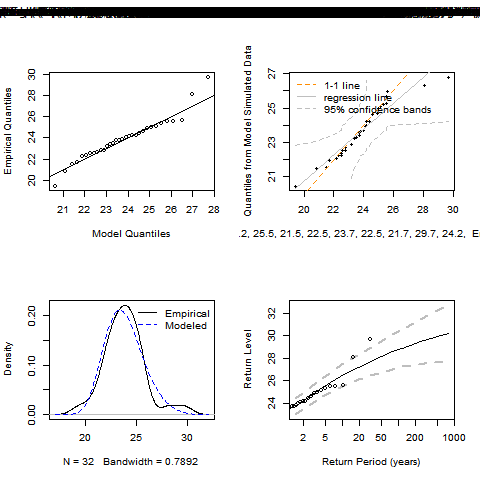

Tipo de Ajuste:  Gumbel
Tipo de Método del Ajuste:  MLE
$par

 location     scale 

22.905876  1.814452 



$value

[1] 67.38487



$counts

function gradient 

      14        5 



$convergence

[1] 0



$message

NULL



$hessian

          location     scale

location  9.719762 -4.762621

scale    -4.762621 21.535378



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

NULL







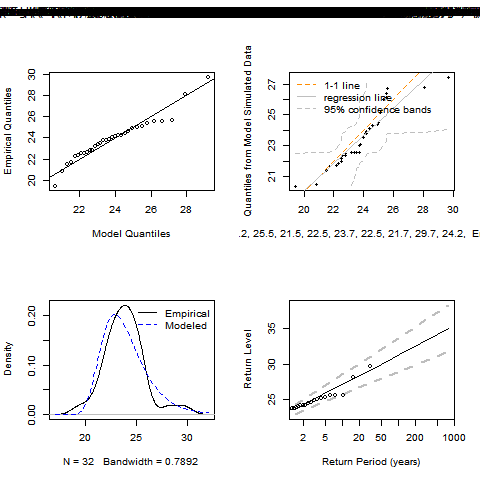

Tipo de Ajuste:  Gumbel
Tipo de Método del Ajuste:  GMLE
$par

 location     scale 

22.905876  1.814452 



$value

[1] 67.38487



$counts

function gradient 

      14        5 



$convergence

[1] 0



$message

NULL



$hessian

          location     scale

location  9.719762 -4.762621

scale    -4.762621 21.535378



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

NULL







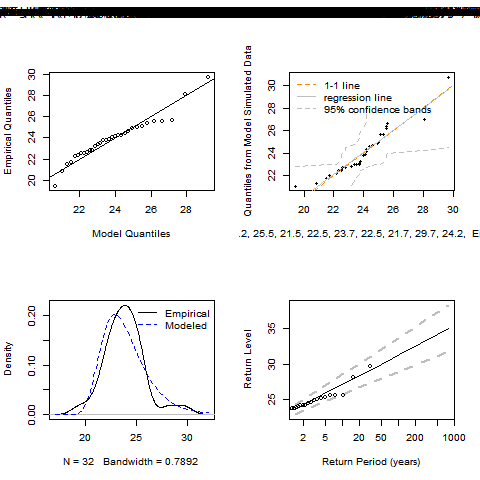

In [86]:
for t in tipos:
    for m in metodos:
        print('Tipo de Ajuste: ',t)
        print('Tipo de Método del Ajuste: ',m)
        result = fevd(max_ws.values,method = m ,type=t)
        print(result.rx('results')[0])
        %R -i result plot.fevd(result)